# Pandas   //  Analyse du Titanic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
     

In [13]:
data = pd.read_excel('/Users/seresiaka/opt/titanic.xls')
#data = pd.read_csv('/Users/seresiaka/opt/pizzas.csv', sep=',', header=None)

data.shape


(1309, 14)

In [14]:
data.head(60)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [15]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Nettoyer votre Dataset avec drop(), dropna() et fillna()

In [16]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
     


In [17]:

data = data.dropna(axis=0)
data.shape
     

(1046, 4)

<AxesSubplot:>

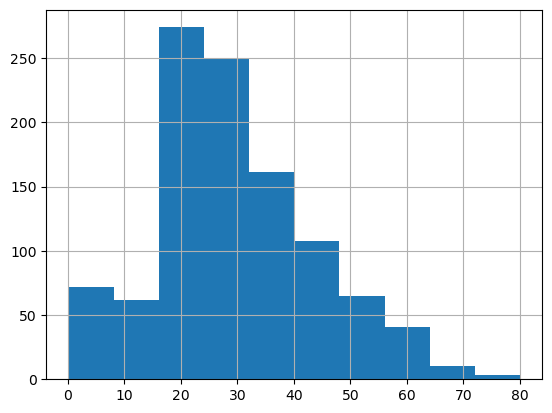

In [18]:
data['age'].hist()
     

# Groupby() et value_counts()

In [19]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [20]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [21]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

In [22]:
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

# . Exercice
Créer des catégories d'ages avec la fonction map() de pandas
Créer des catégories de genres avec cat.codes

In [23]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

In [24]:
data['age'] = data['age'].map(category_ages)

In [25]:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8